# Step 1 Import the Libraries and Read in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import seaborn as sns
from my_func import *

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data_cleaned.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,1800,7503


# Step 2 Explore the Data

### Step 2.1 Descibe the Data

In [3]:
# get the summary
desc_df = df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df.round(2)
#desc_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1788.60,285.72,1971.00,98077.95,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.65,1.17,827.76,439.82,29.38,53.51,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,370.00,0.00,1900.00,98001.00,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1190.00,0.00,1951.00,98033.00,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,0.00,1975.00,98065.00,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,2210.00,550.00,1997.00,98118.00,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,9410.00,4820.00,2015.00,98199.00,6210.00,871200.00
+3_std,1642400.99,6.15,4.42,4834.64,139337.32,3.11,0.25,5.36,11.18,4271.88,1605.18,2059.13,98238.49,4042.31,94581.61
-3_std,-561807.85,0.59,-0.19,-674.00,-109138.50,-0.12,-0.24,1.46,4.14,-694.68,-1033.74,1882.87,97917.41,-69.07,-69065.04


#### Analysis

There are a considerable number of outliers in the data that will have an effect on the output of our linear regression models. The extremity of the outliers can be seen by looking at the max value and comparing it to the + or - 3 standard devation value. 

### Step 2.2 Visualize the Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,True,False,True,True,False,False,False,False,True,True,False,False,False,True,False
bedrooms,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False
bathrooms,True,True,True,True,False,True,False,False,True,True,False,True,False,True,False
sqft_living,True,True,True,True,False,False,False,False,True,True,True,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
floors,False,False,True,False,False,True,False,False,True,True,False,True,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,True,False,True,True,False,True,False,False,True,True,False,True,False,True,False
sqft_above,True,True,True,True,False,True,False,False,True,True,False,True,False,True,False


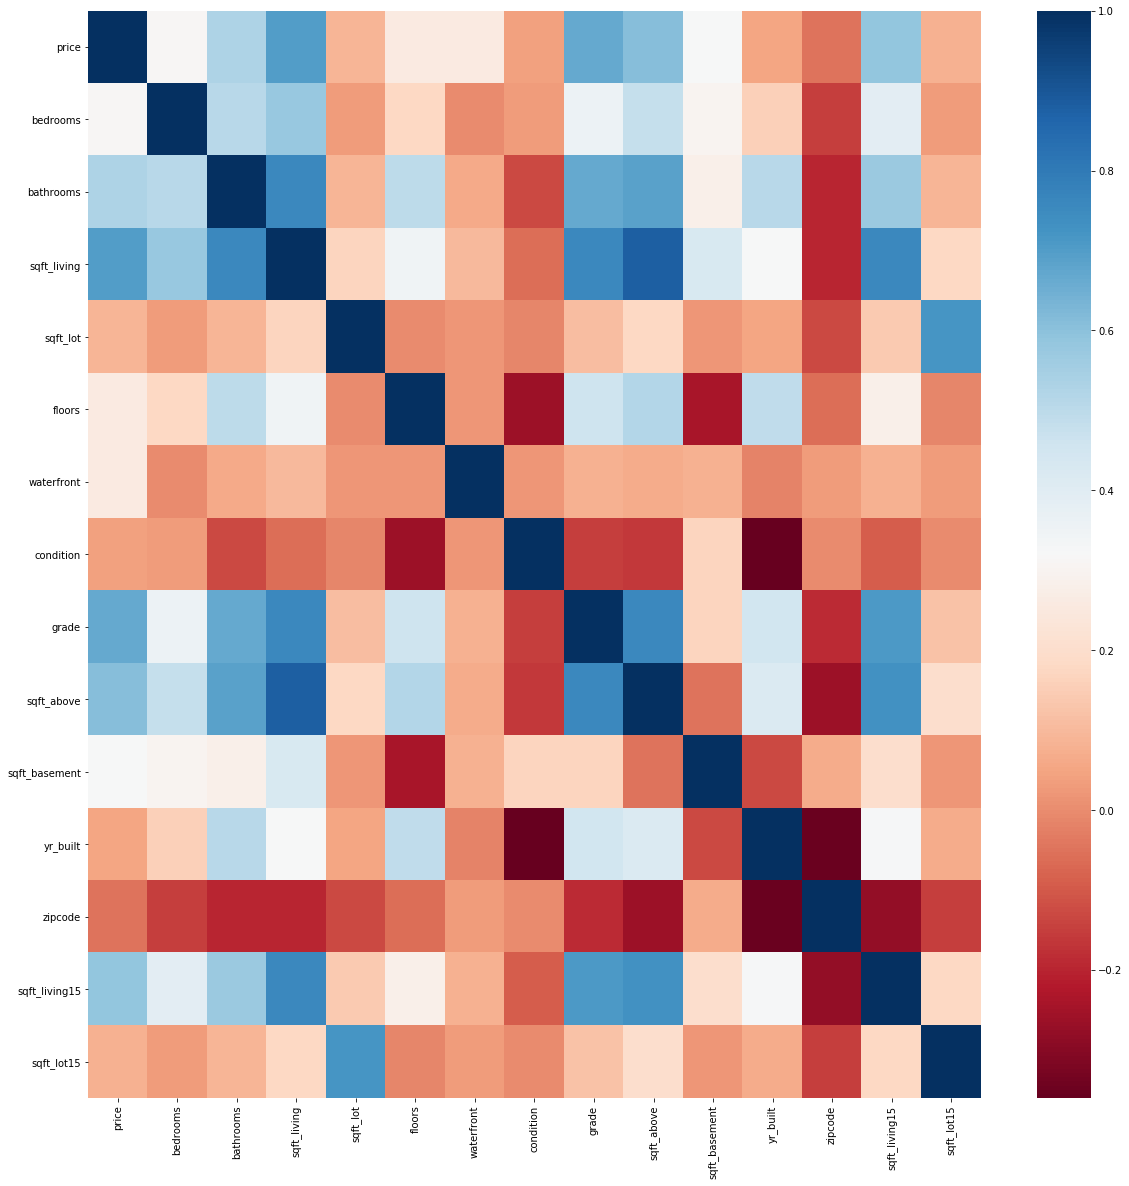

In [4]:
# calculate the correlation matrix
corr = df.corr().round(2)

# display the correlation matrix
plt.figure(figsize=(20,20))
display(corr > .4)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')


In [5]:
corr.price.sort_values(ascending=False)[1:]
#columns that correlate to price - sqft_living, grade, sqft_above,sqft_living15,bathrooms

#sqft_living colinearality with price correlated columns: grade,sqft_above,sqft_living15,bathrooms
#grade colinearlity: sqft_living,bathrooms

sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
sqft_basement    0.32
bedrooms         0.31
waterfront       0.26
floors           0.26
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
zipcode         -0.05
Name: price, dtype: float64

In [6]:
x_variable_columns = ['bedrooms','bathrooms','sqft_living','floors','waterfront','condition',
                      'grade','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15','sqft_lot15']

### Variable Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020484D0F848>,
      dtype=object)

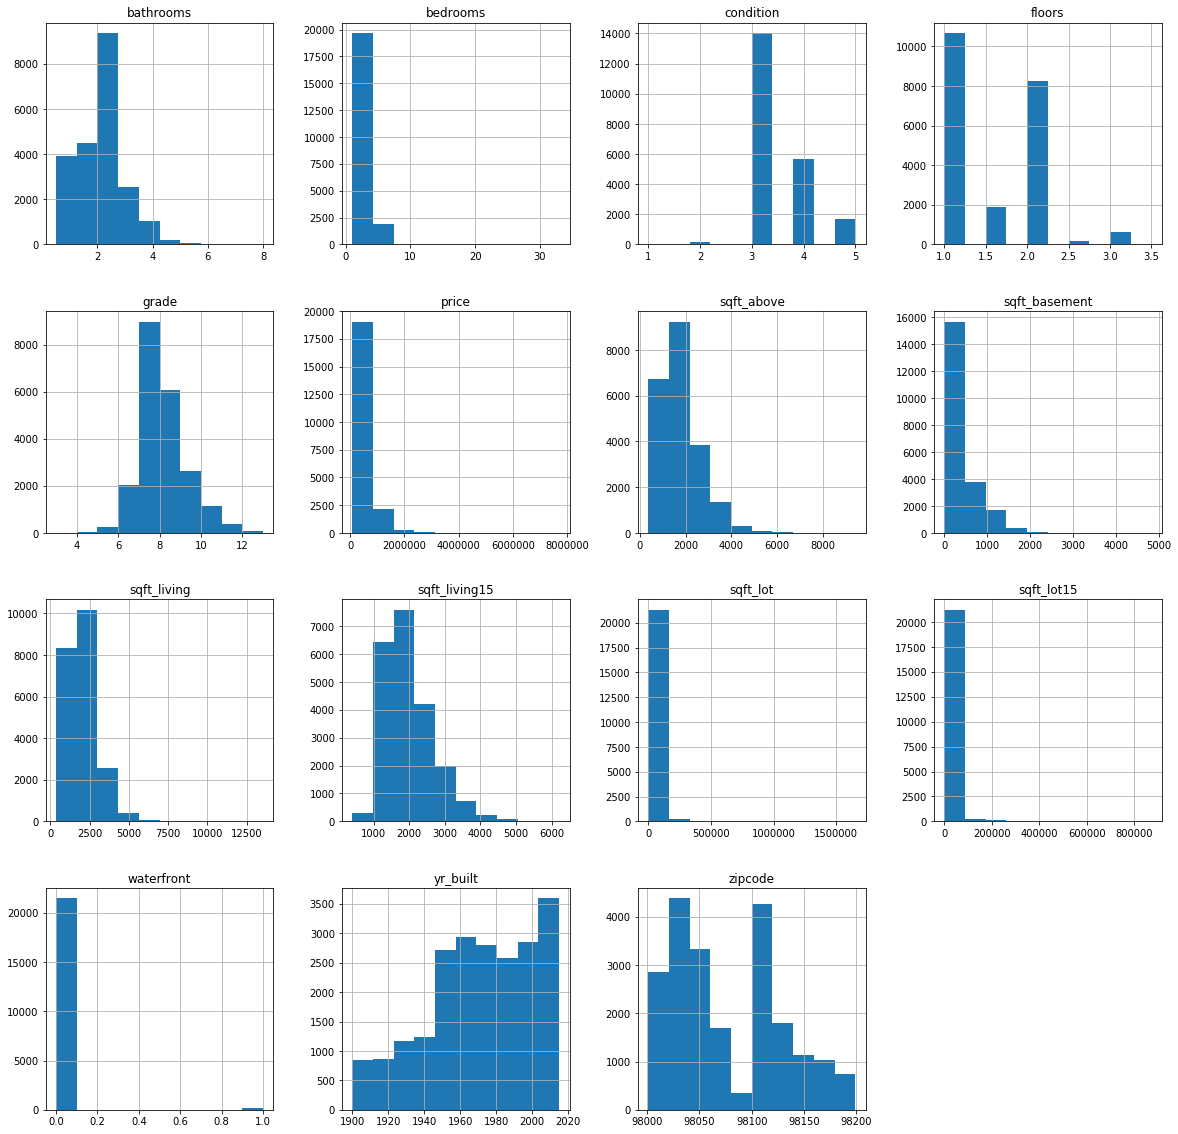

In [7]:
df.hist(figsize=(20,20))


### Scatter Matrix

In [8]:
# define the plot
#pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))

# show the plot
#plt.show()

### Categorical Values

In [9]:
zipcode_df = df.groupby(['zipcode'])
zipcode_df.median().sort_values(['price'],ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,
98039,1895000.0,4.0,3.000,3560.0,17188.5,2.0,0.0,3.0,9.0,3110.0,0.0,1966.0,3105.0,16582.5
98004,1150000.0,4.0,2.500,2660.0,11119.0,1.0,0.0,3.0,9.0,2130.0,0.0,1965.0,2540.0,11377.0
98040,993750.0,4.0,2.500,3020.0,11951.5,1.5,0.0,4.0,9.0,2265.0,515.0,1968.0,2875.0,11664.5
98112,915000.0,3.0,2.250,2330.0,4426.0,2.0,0.0,3.0,8.0,1870.0,435.0,1927.0,2050.0,4500.0
98005,765475.0,4.0,2.375,2505.0,12220.0,1.0,0.0,4.0,8.0,1960.0,275.0,1967.0,2435.0,11623.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98188,264000.0,3.0,1.750,1690.0,8913.0,1.0,0.0,3.0,7.0,1350.0,0.0,1959.5,1590.0,9371.5
98001,260000.0,3.0,2.000,1824.0,9292.0,1.0,0.0,3.0,7.0,1600.0,0.0,1981.0,1700.0,8932.0
98032,249000.0,3.0,1.750,1720.0,8500.0,1.0,0.0,4.0,7.0,1290.0,0.0,1966.0,1700.0,8075.0


### 2.3 Check for Multi-colinearality

In [10]:
# define two data frames one before the drop and one after the drop
df_original = df
df_iter_1 = df_original.drop(columns=['sqft_above','sqft_basement','sqft_living15','sqft_lot15',
                                     'zipcode','yr_built','condition','sqft_lot',
                                     'floors','waterfront','bathrooms'])
#df_after = df_before.drop([], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(df_original)
X2 = sm.tools.add_constant(df_iter_1)

# create the series for both
vif_original = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
vif_iter_1 = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
print('-'*100)
display(vif_original.round(2))
print('*'*100)
print('DATA AFTER')
print('-'*100)
print('-'*100)
display(vif_iter_1.round(2))

DATA BEFORE
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


const            4465744.74
price                  2.84
bedrooms               1.67
bathrooms              3.33
sqft_living          146.90
sqft_lot               2.09
floors                 1.99
waterfront             1.10
condition              1.21
grade                  3.69
sqft_above           118.88
sqft_basement         33.08
yr_built               2.24
zipcode                1.29
sqft_living15          2.84
sqft_lot15             2.12
dtype: float64

****************************************************************************************************
DATA AFTER
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


const          81.61
price           2.18
bedrooms        1.57
sqft_living     3.85
grade           2.64
dtype: float64

### 2.4 Outlier Data
Remove extreme outliers

In [11]:
# filter the data frame to remove the values exceeding 3 standard deviations
df_iter_1 = df_iter_1[(np.abs(stats.zscore(df_iter_1)) < 3).all(axis=1)]

### 2.4.2 Address Positive Skew - Price

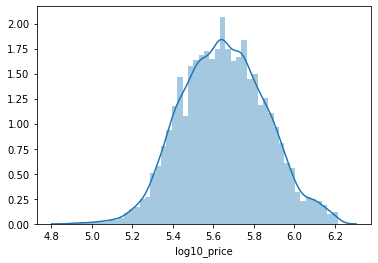

In [12]:
#create new df to keep original intact
transformed_df = df_iter_1

#create new column with log distributed values
transformed_df['log10_price'] = np.log10(df.price)

#check distribution of values
sns.distplot(transformed_df.log10_price)

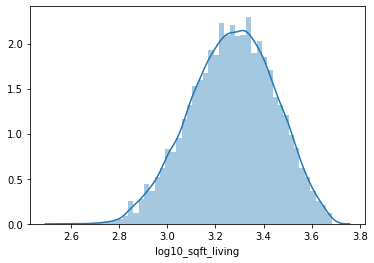

In [13]:
#create new column with log distributed values
transformed_df['log10_sqft_living'] = np.log10(df.sqft_living)

#check distribution of values
sns.distplot(transformed_df.log10_sqft_living)


### Categorical Data

In [14]:
transformed_df['bedrooms'] = df_iter_1['bedrooms']

In [15]:
transformed_df = pd.get_dummies(transformed_df, columns=['grade','bedrooms'], drop_first=True)
transformed_df.head()


,price,sqft_living,log10_price,log10_sqft_living,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
0,221900.0,1180,5.346157,3.071882,0,1,0,0,0,0,0,1,0,0,0
1,538000.0,2570,5.730782,3.409933,0,1,0,0,0,0,0,1,0,0,0
2,180000.0,770,5.255273,2.886491,1,0,0,0,0,0,1,0,0,0,0
3,604000.0,1960,5.781037,3.292256,0,1,0,0,0,0,0,0,1,0,0
4,510000.0,1680,5.707570,3.225309,0,0,1,0,0,0,0,1,0,0,0


# Step 3 Build The Model

In [16]:
# define our input variable (X) & output variable
X = transformed_df.drop(['price','sqft_living','log10_price','bedrooms_2','bedrooms_6'], axis = 1)
Y = transformed_df[['log10_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3.1 Explore the Output

In [17]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print(f"The Coefficient for {coef[0]} is {coef[1]}")

The intercept for our model is 3.999029856319943
----------------------------------------------------------------------------------------------------
The Coefficient for log10_sqft_living is 0.4653087290525727
The Coefficient for grade_6 is 0.06477027774477354
The Coefficient for grade_7 is 0.13972370318867305
The Coefficient for grade_8 is 0.21849045733172087
The Coefficient for grade_9 is 0.3096140005820914
The Coefficient for grade_10 is 0.36893835000377956
The Coefficient for grade_11 is 0.4399909152881052
The Coefficient for bedrooms_3 is -0.0652890736631286
The Coefficient for bedrooms_4 is -0.06892221473723015
The Coefficient for bedrooms_5 is -0.0510157338319821


In [18]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[5.55562009],
       [5.72790306],
       [5.39644802],
       [5.69130072],
       [5.75159746]])

# Step 6: Evaluating the Model

In [19]:
# define our intput
X3 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X3)

# fit the data
est = model.fit()

In [20]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            log10_price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     2053.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:49:14   Log-Likelihood:                 10386.
No. Observations:               20973   AIC:                        -2.075e+04
Df Residuals:                   20962   BIC:                        -2.066e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.0181      0.03

In [21]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE = {:.3} ".format(model_mse))
print("MAE = {:.3}".format(model_mae))
print("RMSE = {:.3}".format(model_rmse))

MSE = 0.022 
MAE = 0.12
RMSE = 0.148


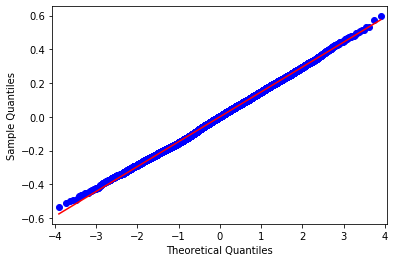

The mean of the residuals is -1.17e-14


In [22]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [23]:
import pickle

# pickle the model.
with open('kc_county_multilinreg.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in to see if everything works
with open('kc_county_multilinreg.sav', 'rb') as pickle_file:
     regression_model_predictor = pickle.load(pickle_file)